Import libraries

In [40]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


Generate data

X [[ 0.17640523 -0.04837975  3.00395099  2.16057371 -0.10517378]
 [ 0.13984914  0.32847254  3.03383776  1.89052903  0.21265031]
 [ 0.29654313  0.38435079  2.91578168  2.12583722  0.27954611]
 [ 0.51960953  0.57123257  2.99503677  2.14580907  0.68264116]
 [ 0.57617414  0.74538793  2.87697546  1.97077968  0.60628914]
 [ 0.38169775  0.91970676  2.90112073  2.06723926  1.01889409]
 [ 0.65965132  1.06804433  3.06020746  2.09316863  0.98003401]
 [ 0.62908197  1.22078298  2.98404514  2.10442932  0.83640144]
 [ 0.70703421  1.56743515  2.8716652   2.00828541  0.93021428]
 [ 0.82438676  1.52178427  2.87617799  1.94159486  0.87491239]]


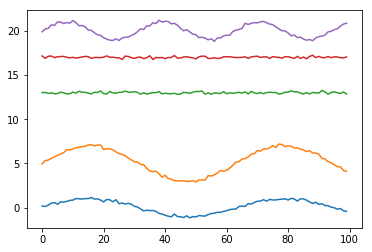

In [41]:
N=100000
X = np.zeros(shape=(N,5))
# X[:,0] = 2*np.ones(shape=(N,))
# X[:,1] = 3*np.ones(shape=(N,))
# X[:,2] = 4*np.ones(shape=(N,))
sigma = 0.1
xt=np.arange(0,N/10,1/10)
X[:,0] = 1*np.sin(1*xt) + np.random.normal(0, sigma, N)
X[:,1] = 2*np.sin(1*xt) + np.random.normal(0, sigma, N) # close duplicate of col above
X[:,2] = np.random.normal(3, sigma, N)
X[:,3] = np.random.normal(2, sigma, N) # close duplicate of col above
X[:,4] = np.sin(2*xt) + np.random.normal(0, sigma, N)

print('X',X[0:10,:])

# plot
from matplotlib import pyplot as plt
X_plt = X+np.array([0,5,10,15,20])
plt.plot(X_plt[0:100,:])
plt.show()

Do PCA with n_components = MLE

PCA MLE
X_pca [[ 0.03475801 -0.10545239]
 [ 0.35529032  0.21244907]
 [ 0.47530505  0.27944341]
 [ 0.74210293  0.68268579]
 [ 0.92318518  0.60640509]
 [ 0.99182741  1.0189767 ]
 [ 1.24894143  0.98027413]
 [ 1.3718862   0.83667461]
 [ 1.71670878  0.93061938]
 [ 1.72844835  0.87535311]]


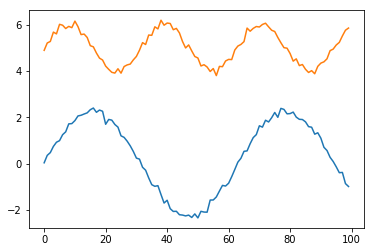

In [42]:
print("PCA MLE")
encoding_dim_pca = 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca = pca.fit_transform(X)
print("X_pca",X_pca[0:10,:])

# plot
X_pca_plt = X_pca+np.array([0,5])
plt.plot(X_pca_plt[0:100,:])
plt.show()

PCA without dim reduction

PCA
X_pca [[  3.47580068e-02  -1.05452392e-01   1.47445840e-01  -1.77914247e-01
   -6.68459388e-02]
 [  3.55290320e-01   2.12449074e-01  -1.52054485e-02   1.14663446e-01
   -1.86376387e-02]
 [  4.75305046e-01   2.79443409e-01   2.04711924e-02  -1.68582085e-01
   -5.12717941e-02]
 [  7.42102929e-01   6.82685787e-01   1.53062298e-01  -1.76826728e-01
   -1.00418395e-01]
 [  9.23185182e-01   6.06405093e-01  -1.23434598e-03  -7.66492333e-02
   -2.07565596e-01]
 [  9.91827410e-01   1.01897670e+00  -9.92295048e-02  -8.57310222e-02
    4.48740884e-02]
 [  1.24894143e+00   9.80274128e-01   1.34827457e-01  -7.79884002e-02
   -2.07393636e-02]
 [  1.37188620e+00   8.36674609e-01   2.42628976e-02  -9.98096849e-02
    2.80916588e-02]
 [  1.71670878e+00   9.30619377e-01  -1.37468996e-01  -4.98265800e-02
    4.97718440e-03]
 [  1.72844835e+00   8.75353114e-01  -8.08111910e-02  -2.16975325e-02
   -1.22256424e-01]]


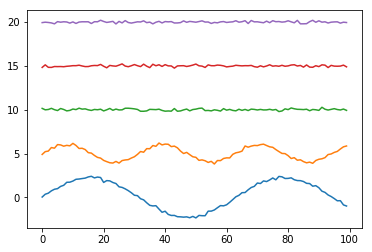

In [43]:
print("PCA")
encoding_dim_pca = X.shape[1] # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca = pca.fit_transform(X)
print("X_pca",X_pca[0:10,:])

# plot
X_pca_plt = X_pca+np.array([0,5,10,15,20])
plt.plot(X_pca_plt[0:100,:])
plt.show()

Normalize PCA output

X_pca normalized [[ 0.50271812  0.45813409  0.60734007  0.291515    0.39937594]
 [ 0.5648972   0.57464832  0.4363259   0.62526456  0.45588769]
 [ 0.58817849  0.59920246  0.47383689  0.30216039  0.41763259]
 [ 0.6399338   0.74699504  0.61324531  0.29275555  0.36002092]
 [ 0.67506139  0.71903736  0.45101534  0.40703014  0.23441856]
 [ 0.68837709  0.8702492   0.34798165  0.39667035  0.53033876]
 [ 0.73825385  0.8560643   0.5940729   0.40550252  0.45342396]
 [ 0.76210353  0.80343357  0.47782355  0.38061052  0.5106657 ]
 [ 0.82899461  0.83786531  0.30777604  0.43762731  0.48356996]
 [ 0.83127193  0.81760965  0.36734696  0.46971471  0.33442148]]


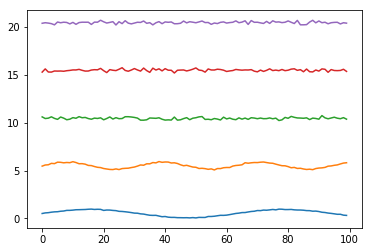

In [44]:
# https://gist.github.com/shadiakiki1986/2c293e364563492c65bffdb6122b4e92
from sklearn.preprocessing import MinMaxScaler #  normalize,
min_max_scaler = MinMaxScaler()
# def myNorm3(X): return normalize(X, norm='l2', axis=0)
def myNorm3(X): return min_max_scaler.fit_transform(X)
X_pca = myNorm3(X_pca)
print("X_pca normalized",X_pca[0:10,:])

# plot
X_pca_plt = X_pca+np.array([0,5,10,15,20])
plt.plot(X_pca_plt[0:100,:])
plt.show()

AE with PCA

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 2s - loss: 0.0420 - val_loss: 0.0390
Epoch 2/10
80000/80000 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0318
Epoch 3/10
80000/80000 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0249
Epoch 4/10
80000/80000 [==============================] - 1s - loss: 0.0219 - val_loss: 0.0190
Epoch 5/10
80000/80000 [==============================] - 1s - loss: 0.0160 - val_loss: 0.0132
Epoch 6/10
80000/80000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0095
Epoch 7/10
80000/80000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0082
Epoch 8/10
80000/80000 [==============================] - 1s - loss: 0.0080 - val_loss: 0.0078
Epoch 9/10
80000/80000 [==============================] - 1s - loss: 0.0078 - val_loss: 0.0077
Epoch 10/10
80000/80000 [==============================] - 1s - loss: 0.0077 - val_

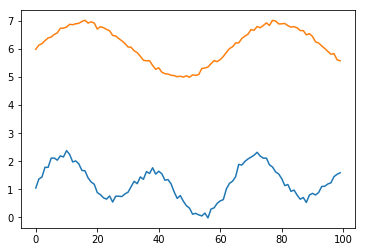

In [45]:
# split
X_train, X_test = train_test_split(X_pca, train_size=0.8, random_state=8888)

# could make wrapper from https://gist.github.com/ktrnka/81c8a7b79cb05c577aab
# and make pipeline
# copied from simple example at https://blog.keras.io/building-autoencoders-in-keras.html
print("autoencoder")
from keras.layers import Input, Dense, Dropout
from keras.models import Model, load_model
from keras.layers.advanced_activations import LeakyReLU #, PReLU

input_img = Input(shape=(X_pca.shape[1],))
encoded = input_img
encoding_dim_ae = 2
# encoded = Dense( encoding_dim_ae, activation='relu' )(encoded)

# hidden layer
encoded = Dense( encoding_dim_ae, activation='linear' )(encoded)

# use leaky relu
# https://github.com/fchollet/keras/issues/117
encoded = LeakyReLU(alpha=.3)(encoded)   # add an advanced activation

# GET DEEP
# encoding_dim2 = 50
# encoding_dim3 = 10
# encoded = Dense(encoding_dim2, activation='relu')(encoded)
# encoded = Dense(encoding_dim3, activation='relu')(encoded)
# decoded = Dense(encoding_dim2, activation='relu')(encoded)

decoded = Dense(X_pca.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# encoded_input = Input(shape=(encoding_dim_ae,))
# decoder_layer = autoencoder.layers[-1]
# decoder = Model(encoded_input, decoder_layer(encoded_input))

# other: optimizer='adadelta', loss='binary_crossentropy'
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')
encoder.compile(optimizer='rmsprop', loss='mean_squared_error')
# decoder.compile(optimizer='rmsprop', loss='mean_squared_error')

# train autoencoder
autoencoder.fit(
  X_train,
  X_train,
  epochs=10, # 25, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca)
# print("encoded",X_enc)
# # X_enc_dec = decoder.predict(X_enc)
# # print("enc-dec",X_enc_dec)
# X_rec = autoencoder.predict(X_pca)
# print("recoded",X_rec)

# plot
# from matplotlib import pyplot as plt
plt.plot(X_enc[0:100,:]+np.array([0,5]))
plt.show()

AE without PCA

X normalized [[ 0.57256629  0.48237672  0.50144069  0.68264278  0.45789738]
 [ 0.55996018  0.56194547  0.5381266   0.3728326   0.57438926]
 [ 0.61399499  0.57374362  0.39321318  0.64279116  0.59890853]
 [ 0.69091786  0.61320192  0.49049852  0.66570397  0.74665473]
 [ 0.71042376  0.64997315  0.34557868  0.46490058  0.71866947]
 [ 0.64335996  0.6867789   0.37521691  0.57556434  0.86990132]
 [ 0.73921027  0.71809896  0.57049531  0.60531194  0.85565796]
 [ 0.72866865  0.75034826  0.47700633  0.61823083  0.8030124 ]
 [ 0.75554993  0.82354054  0.33906036  0.50792923  0.83739756]
 [ 0.79601813  0.81390179  0.34459979  0.43141814  0.81712779]]


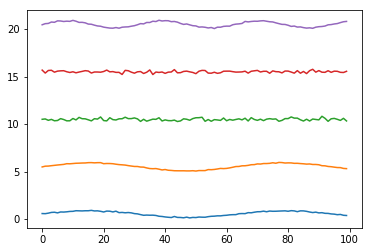

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 1s - loss: 0.0195 - val_loss: 0.0196
Epoch 2/10
80000/80000 [==============================] - 1s - loss: 0.0195 - val_loss: 0.0195
Epoch 3/10
80000/80000 [==============================] - 1s - loss: 0.0195 - val_loss: 0.0195
Epoch 4/10
80000/80000 [==============================] - 1s - loss: 0.0195 - val_loss: 0.0195
Epoch 5/10
80000/80000 [==============================] - 1s - loss: 0.0194 - val_loss: 0.0195
Epoch 6/10
80000/80000 [==============================] - 1s - loss: 0.0192 - val_loss: 0.0191
Epoch 7/10
80000/80000 [==============================] - 1s - loss: 0.0184 - val_loss: 0.0176
Epoch 8/10
80000/80000 [==============================] - 1s - loss: 0.0161 - val_loss: 0.0146
Epoch 9/10
80000/80000 [==============================] - 1s - loss: 0.0127 - val_loss: 0.0109
Epoch 10/10
80000/80000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0078

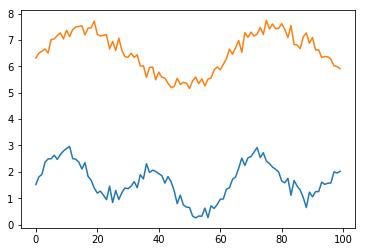

In [46]:
X_norm = myNorm3(X)
print("X normalized",X_norm[0:10,:])

# plot
X_norm_plt = X_norm+np.array([0,5,10,15,20])
plt.plot(X_norm_plt[0:100,:])
plt.show()

# split
X_train, X_test = train_test_split(X_norm, train_size=0.8, random_state=8888)

# train autoencoder
autoencoder.fit(
  X_train,
  X_train,
  epochs=10, # 25, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca)

plt.plot(X_enc[0:100,:]+np.array([0,5]))
plt.show()